In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import json
import requests

In [2]:
Archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    image_pre = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
df= [] 

with open('tweet-json.txt') as file: 
    for line in file:
        df.append(json.loads(line))

In [5]:
print(df[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [6]:
tweet = pd.DataFrame(df,columns= ['id','retweet_count','favorite_count'])

In [7]:
tweet.rename(columns={'id':'tweet_id'} ,inplace= True)

In [35]:
Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
Archive.duplicated().sum()

0

In [12]:
Archive['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [13]:
image_pre.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pre.duplicated().sum()

0

In [16]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [18]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [19]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


# Quality issues
1- Drop unnecessary columns. 
2- Archive, we do not need the column "text"
3- The data type of tweet_id should be object
4- last four columns should be quantitative instead of categorical columns.
5- retweeted_status_timestamp change the data type to date time
6- Missing values in Twitter API
7- Change the data type of timestamp	
8- Drop rows which are not dogs in image_pre



# Tidiness issues
1- All data sets can be structured in one data set 
2- dogs breeds should be in one column 

# Cleaning Data

In [20]:
Archive_c = Archive.copy()
image_pre_c = image_pre.copy()
tweet_c = tweet.copy()

# Tidiness issues 1

# Define
merge all three data sets in one data set because all are related

In [21]:
dfs = [Archive_c,image_pre_c,tweet_c]
import functools as ft
tweets = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs) 

# test

In [22]:
tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


# Quality issues 1

# define

Drop unnecessary columns that we will not use in our analysy

In [23]:
tweets.drop(columns=['source','expanded_urls','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
            ,inplace= True) # I dropped retweets

# test

In [24]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2073 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2073 non-null   object 
 4   text                   2073 non-null   object 
 5   rating_numerator       2073 non-null   int64  
 6   rating_denominator     2073 non-null   int64  
 7   name                   2073 non-null   object 
 8   doggo                  2073 non-null   object 
 9   floofer                2073 non-null   object 
 10  pupper                 2073 non-null   object 
 11  puppo                  2073 non-null   object 
 12  jpg_url                2073 non-null   object 
 13  img_num                2073 non-null   int64  
 14  p1                     2073 non-null   object 
 15  p1_c

# Quality issues 2

# define

combine the dogs stages in one column and then drop the columns

In [36]:
tweets['dogs'] = tweets['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [39]:
tweets['dogs'].fillna('multiple',inplace=True)

In [26]:
tweets.drop(columns=['doggo','floofer','pupper','puppo'],inplace = True)

# test

In [37]:
tweets.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dogs
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,This is Koda. He is a South Australian decksha...,13,10,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,...,True,Pomeranian,0.013884,True,chow,0.008167,True,7624,31166,NaN


In [27]:
indexNames = tweets[ (tweets['p1_dog'] == False) & (tweets['p2_dog'] == False) & (tweets['p3_dog'] == False) ].index
tweets.drop(indexNames , inplace=True)

In [28]:
tweets.head(40)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dogs
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,This is Koda. He is a South Australian decksha...,13,10,Koda,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,...,True,Pomeranian,0.013884,True,chow,0.008167,True,7624,31166,NaN


In [29]:
tweets['tweet_id']=tweets['tweet_id'].astype(np.object)
tweets['timestamp']=pd.to_datetime(tweets['timestamp'])
print(tweets.dtypes);

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                datetime64[ns, UTC]
text                                  object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
jpg_url                               object
img_num                                int64
p1                                    object
p1_conf                              float64
p1_dog                                  bool
p2                                    object
p2_conf                              float64
p2_dog                                  bool
p3                                    object
p3_conf                              float64
p3_dog                                  bool
retweet_count                          int64
favorite_count                         int64
dogs                                  object
dtype: obj

<ipython-input-29-fbf53fe15dad>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tweets['tweet_id']=tweets['tweet_id'].astype(np.object)


# Storing data

In [30]:
tweets.to_csv('Twitter_project.csv')

# Data Analysis and Visualization

In [41]:
dogs = tweets['dogs'].value_counts()
dogs

multiple    1467
pupper       188
doggo         64
puppo         28
floofer        3
Name: dogs, dtype: int64

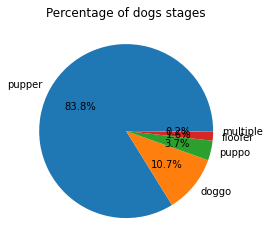

In [44]:
plt.pie(dogs,labels=['pupper','doggo','puppo','floofer','multiple'],autopct= '%1.1f%%')
plt.title('Percentage of dogs stages');

# Insights

1- Pupper has the largest number 
2- Floofer has the lowest number
3- The total number of four breeds is 283

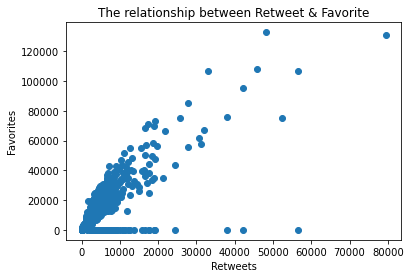

In [33]:
plt.scatter(tweets['retweet_count'],tweets['favorite_count'])
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('The relationship between Retweet & Favorite');

The relationship between retweets and favorite is positive relationship